<a href="https://colab.research.google.com/github/kumarand-tcs/AIML-Projects/blob/main/BCCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Churn Prediction**
# Objective:
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

In [163]:
import numpy                as np
import pandas               as pd
import warnings
import tensorflow           as tf
import seaborn              as sns
import matplotlib.pyplot    as plt
%matplotlib inline


from sklearn.compose            import ColumnTransformer
from sklearn.preprocessing      import OneHotEncoder
from sklearn.preprocessing      import LabelEncoder
from sklearn.model_selection    import train_test_split
from sklearn.preprocessing      import StandardScaler
from tensorflow.keras           import Sequential
from tensorflow.keras.layers    import Dense

# 1. Read the dataset

Read the data set from CSV file.

In [164]:
bcp_df = pd.read_csv('https://github.com/kumarand-tcs/AIML-Projects/raw/main/DeepLearning/bank.csv')
bcp_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [165]:
bcp_df.shape

(10000, 14)

In [166]:
bcp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [167]:
bcp_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [168]:
bcp_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [169]:
bcp_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 2. Drop the columns which are unique for all users like IDs

In [170]:
# Make a copy of DataFrames and do the maniplactions
nbcp_df = bcp_df.copy(True)


In [171]:
nbcp_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [172]:
nbcp_df = pd.get_dummies(nbcp_df, prefix='Loc', columns=['Geography'], drop_first=True)
nbcp_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loc_Germany,Loc_Spain
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


In [173]:
nbcp_df = pd.get_dummies(nbcp_df, prefix='Gdr', columns=['Gender'], drop_first=True)
nbcp_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loc_Germany,Loc_Spain,Gdr_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [174]:
nbcp_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
nbcp_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loc_Germany,Loc_Spain,Gdr_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [175]:
 nbcp_df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [176]:
nbcp_df['CreditScore'] = np.where(nbcp_df['CreditScore'].between(350,580), 1, nbcp_df['CreditScore'])
nbcp_df['CreditScore'] = np.where(nbcp_df['CreditScore'].between(581,650), 2, nbcp_df['CreditScore'])
nbcp_df['CreditScore'] = np.where(nbcp_df['CreditScore'].between(651,720), 3, nbcp_df['CreditScore'])
nbcp_df['CreditScore'] = np.where(nbcp_df['CreditScore'].between(721,850), 4, nbcp_df['CreditScore'])

In [177]:
nbcp_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loc_Germany,Loc_Spain,Gdr_Male
0,2,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,1,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,3,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,4,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Observation:

1. Dropped following columns RowNumber, CustomerId, Surnames columns for 
better prediction
2. 3 unique values in Geography. converted using one hot encoding for numeric values
3. 2 unique values in gender. converted using one hot encoding for numberic values
4. Creditscore is numeric but still changed as range here, 1, 2,3,4
 - 1 means 350 to 580
 - 2 means 581 to 650
 - 3 means 651 to 720
 - 4 means 721 to 850
This gives a good impression on the data quality

# 3. Perform bivariate analysis and give your insights from the same  

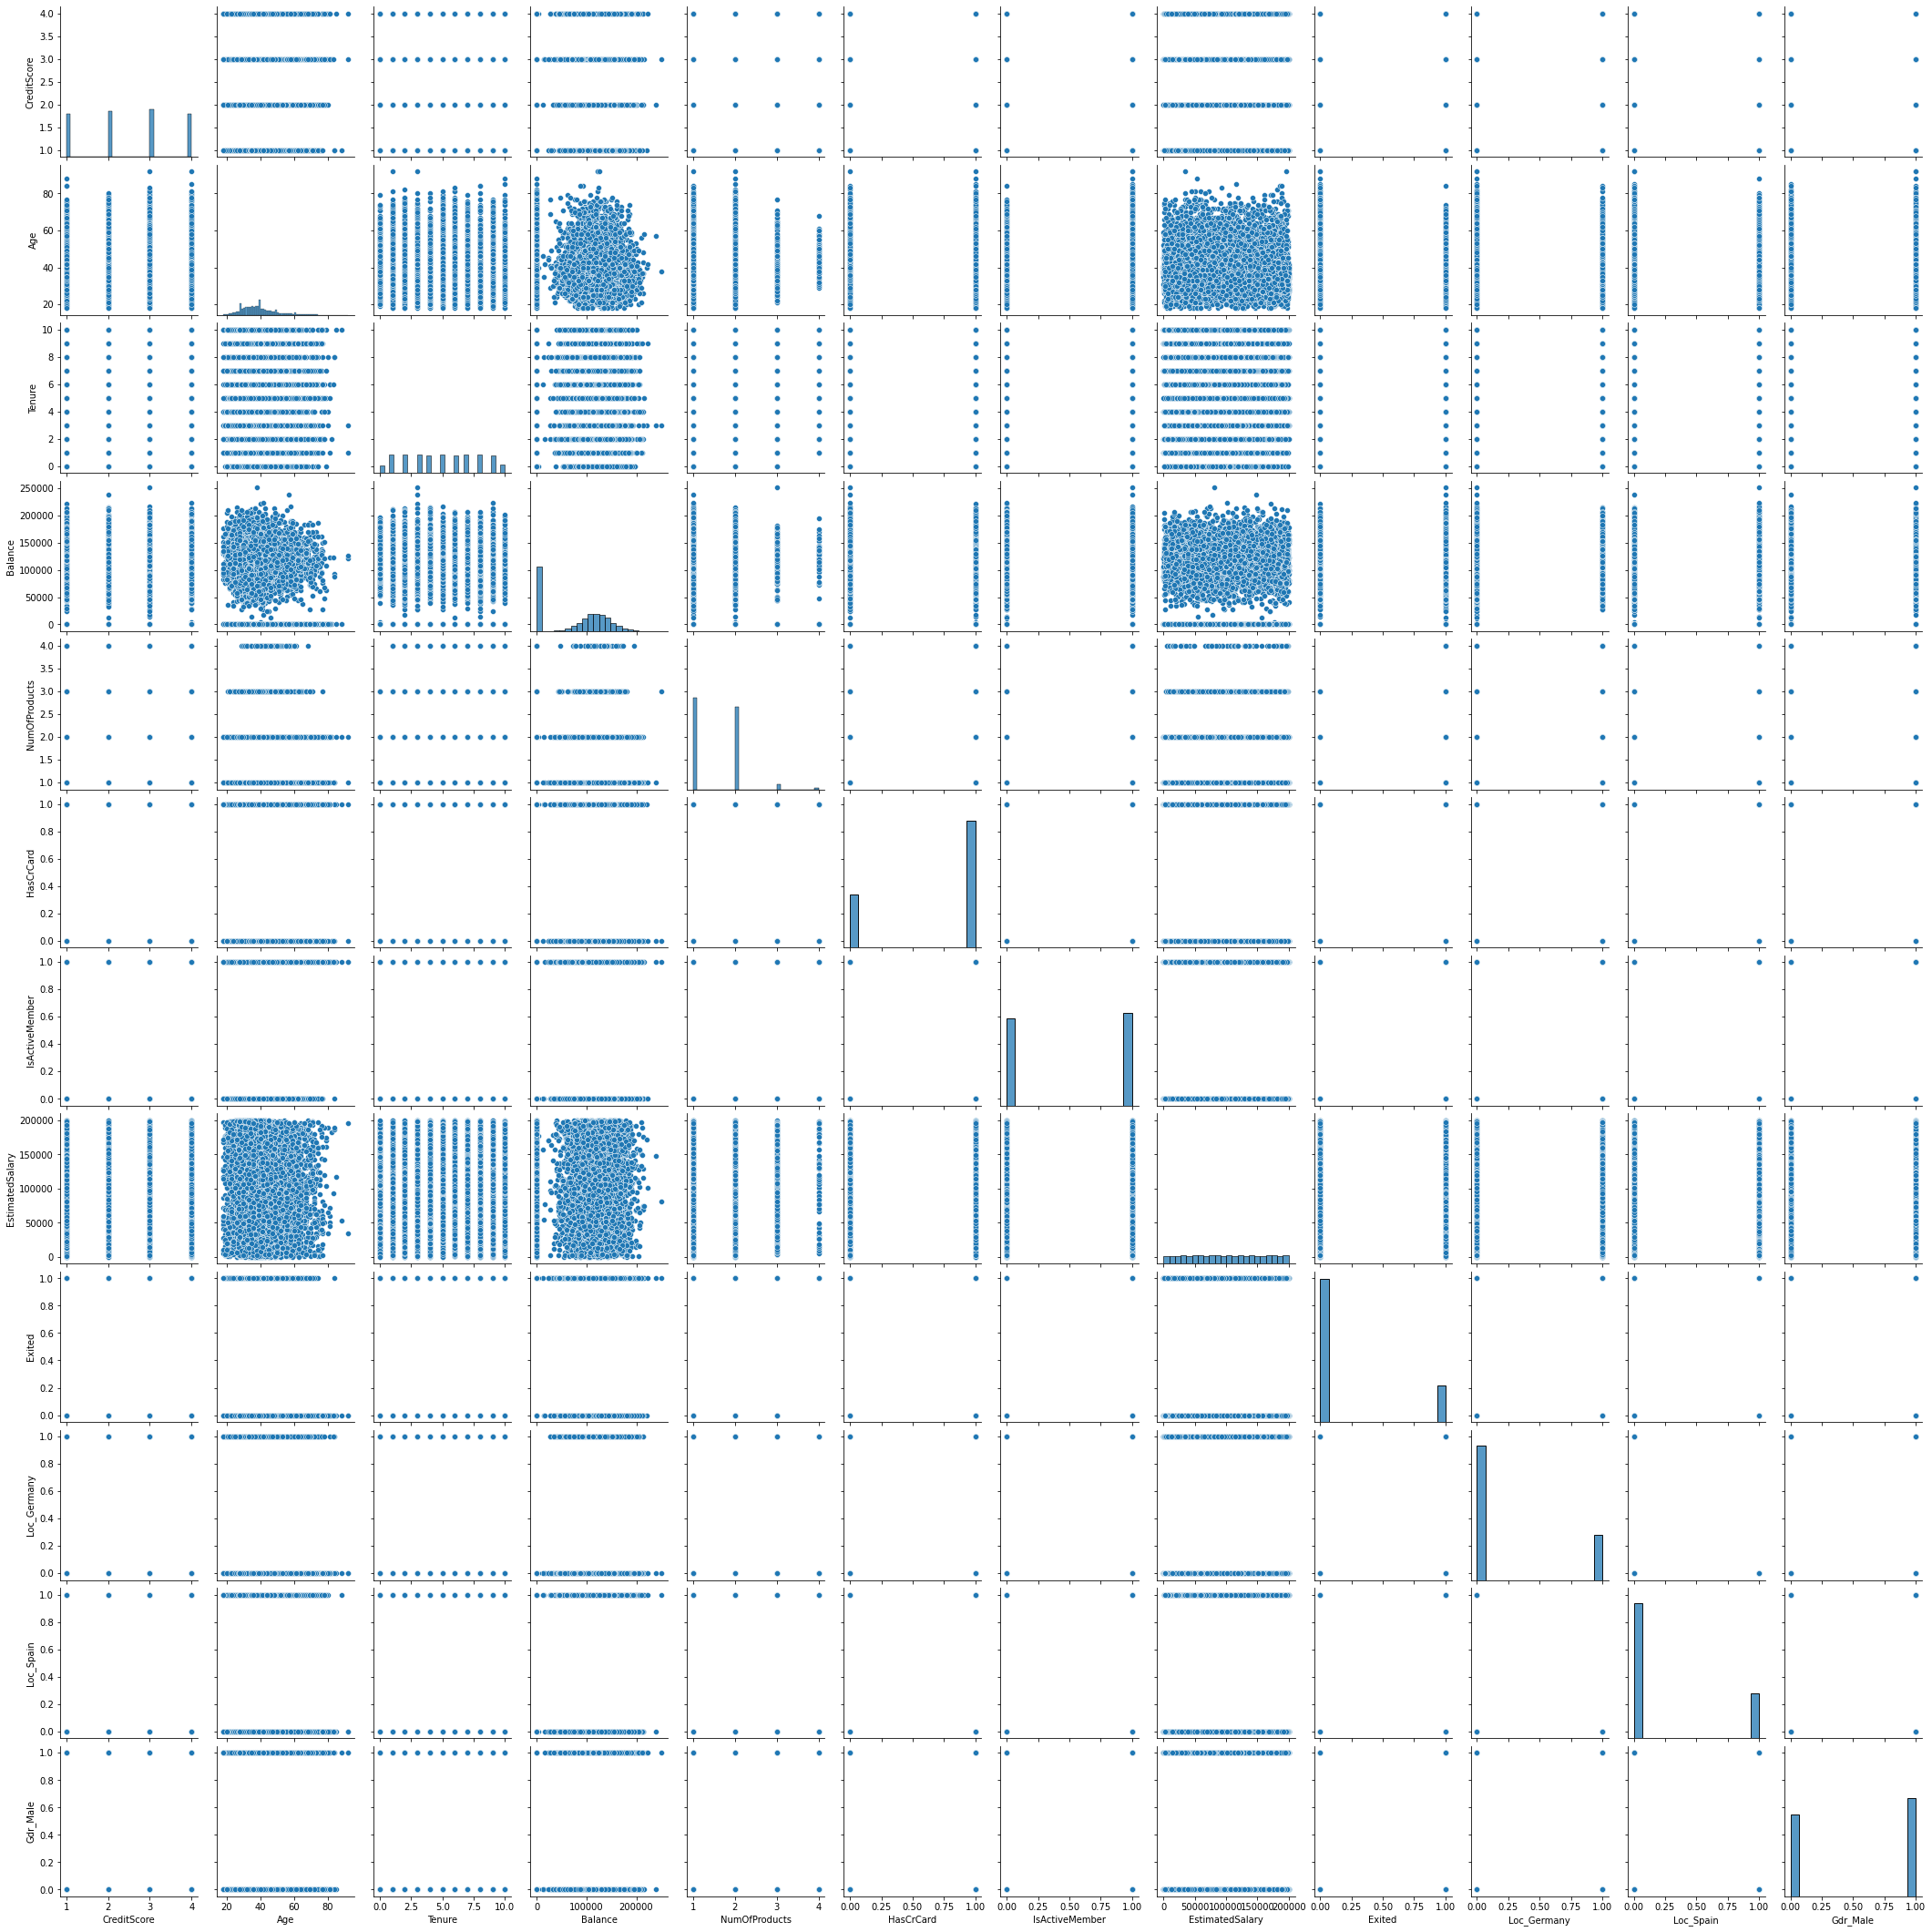

In [178]:
sns.pairplot(nbcp_df)

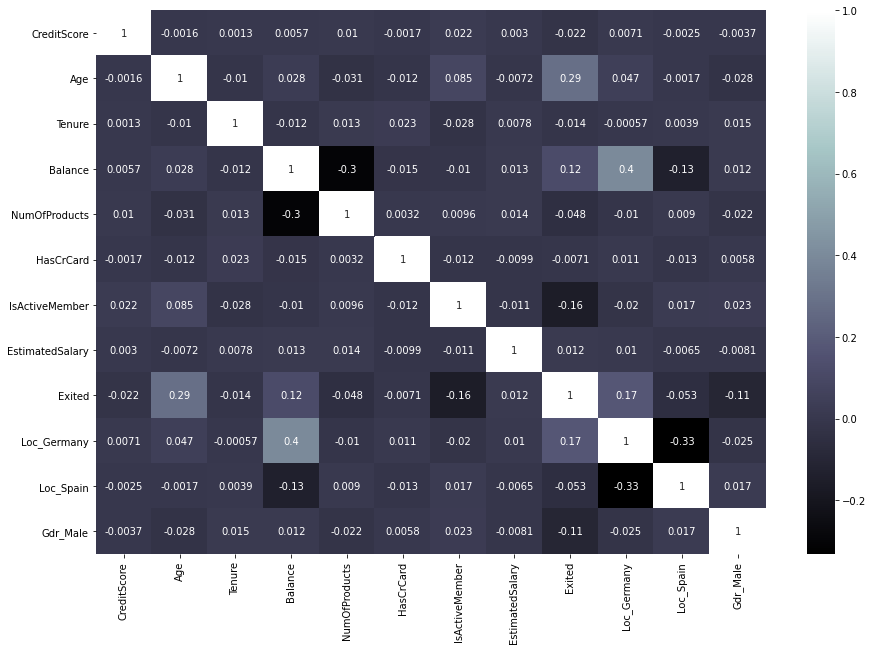

In [179]:

plt.figure(figsize=(15,10))
gph=sns.heatmap(nbcp_df.corr(),annot=True,cmap="bone")


Observation: 
1. pairplot and Heat map on the correlation data shows above, but we did not get any strong relation in the features.
2. so we can check how it is related using comparasion chart with features below.

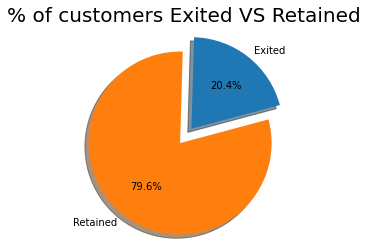

In [180]:
# Pie chart for the % of customers retained

labels = ['Exited', 'Retained']
sizes = [nbcp_df.Exited[nbcp_df['Exited'] == 1].count(), nbcp_df.Exited[nbcp_df['Exited'] == 0].count()]
explode = [0.1, 0]

# create and plot the pie chart

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=15, radius=0.5, )
plt.title("% of customers Exited VS Retained", size = 20)
plt.axis('equal')
plt.show()

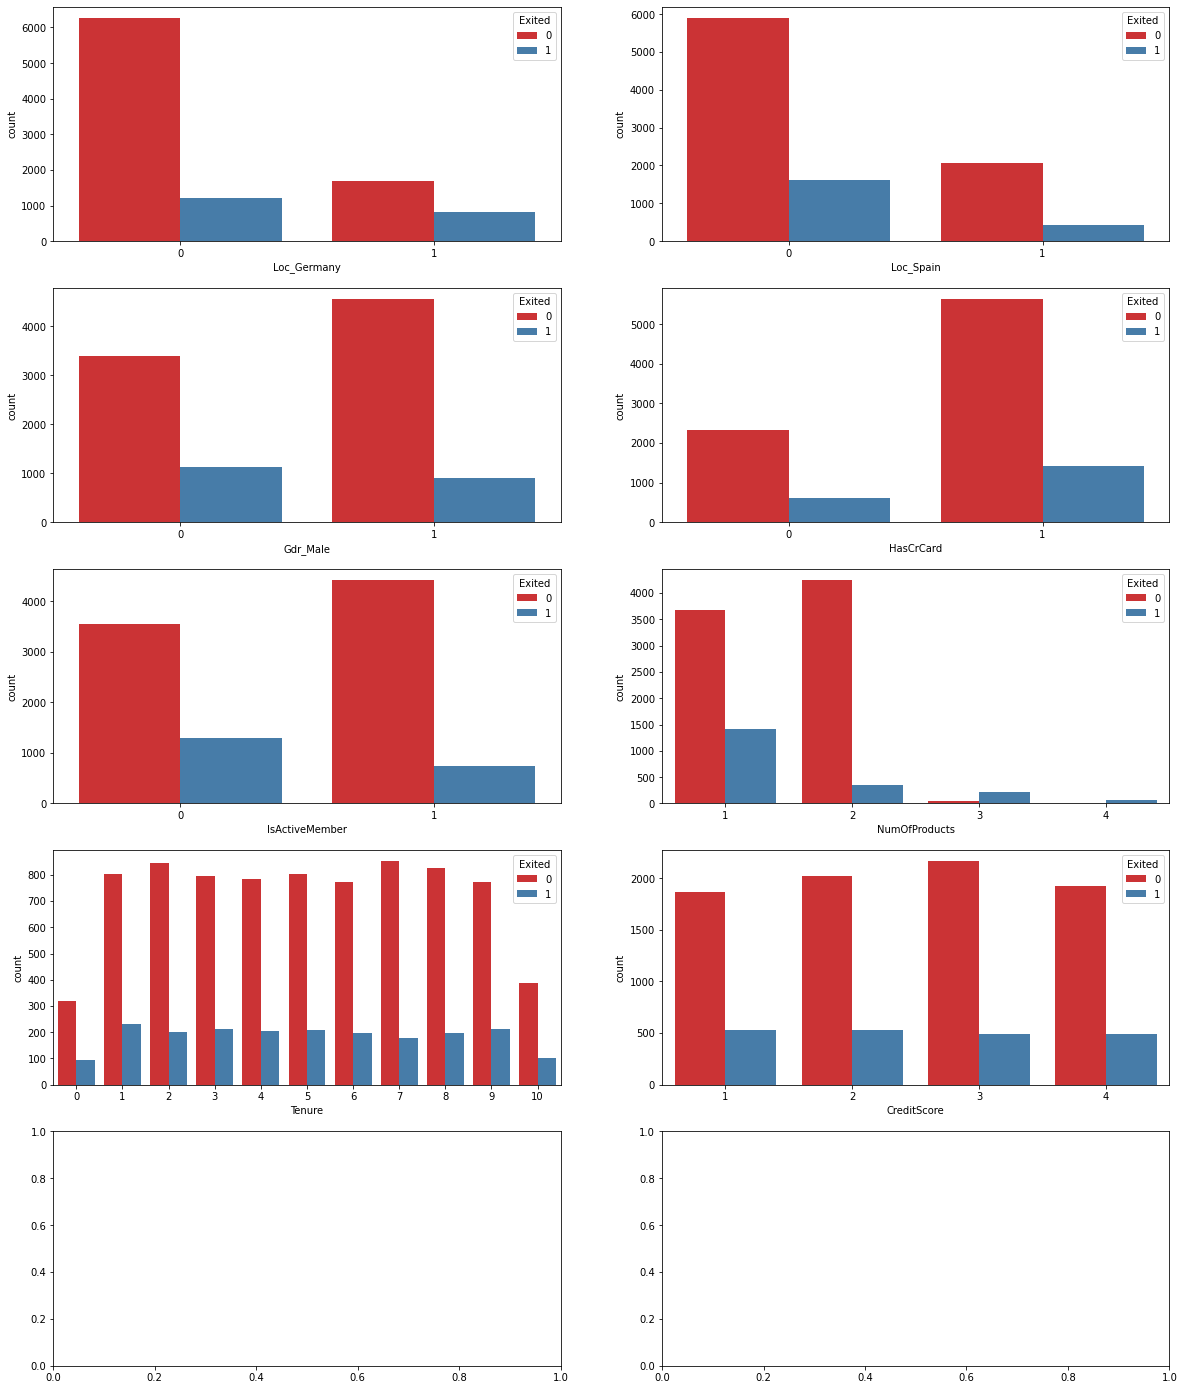

In [181]:


fig, ax = plt.subplots(5, 2, figsize=(20, 25))

sns.countplot(x='Loc_Germany',     hue='Exited', data=nbcp_df, palette='Set1', ax=ax[0][0])
sns.countplot(x='Loc_Spain',       hue='Exited', data=nbcp_df, palette='Set1', ax=ax[0][1])
sns.countplot(x='Gdr_Male',        hue='Exited', data=nbcp_df, palette='Set1', ax=ax[1][0])
sns.countplot(x='HasCrCard',       hue='Exited', data=nbcp_df, palette='Set1', ax=ax[1][1])
sns.countplot(x='IsActiveMember',  hue='Exited', data=nbcp_df, palette='Set1', ax=ax[2][0])
sns.countplot(x='NumOfProducts',   hue='Exited', data=nbcp_df, palette='Set1', ax=ax[2][1])
sns.countplot(x='Tenure',          hue='Exited', data=nbcp_df, palette='Set1', ax=ax[3][0])
sns.countplot(x='CreditScore',     hue='Exited', data=nbcp_df, palette='Set1', ax=ax[3][1])
#sns.countplot(x='Balance',         hue='Exited', data=nbcp_df, palette='Set1', ax=ax[4][0])
#sns.countplot(x='EstimatedSalary', hue='Exited', data=nbcp_df, palette='Set1', ax=ax[4][1])
plt.show()

# 4. Distinguish the feature and target set and divide the data set into training and test sets 

In [182]:
# Mark Target is 'Exited' and drop Exited column for data set
y = nbcp_df['Exited']
X = nbcp_df.drop('Exited', axis = 1)
#Split data into 70:30 ratio, its best ratio we know.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 7)

In [183]:
# Convert Target train and test variable from series to array for scalers
y_train =  np.array(y_train)
y_test =  np.array(y_test)

# 5. Normalize the train and test data

In [184]:
# Using Standard scaler for Train and test data set. 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_test = scaler.transform(X_test)

# 6. Initialize & build the model. Identify the points of improvement and implement the same

In [185]:
ncols = X_train.shape[0]
model = Sequential()                                                          # Lets initialize the constructor
model.add(Dense(20, activation='softmax', kernel_initializer='normal'))       # First hidden layer 
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))       # Second hidden layer
model.add(Dense(1, activation = 'softmax'))                                   # output layer with one neuron 
model.compile(optimizer='sgd', loss='categorical_crossentropy',  metrics = ['accuracy'])
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),batch_size=X_train.shape[0])

Epoch 1/50
1/1 [==============================] - 1s 562ms/step - loss: 0.0000e+00 - accuracy: 0.2046 - val_loss: 0.0000e+00 - val_accuracy: 0.2017
Epoch 2/50
1/1 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - accuracy: 0.2046 - val_loss: 0.0000e+00 - val_accuracy: 0.2017
Epoch 3/50
1/1 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - accuracy: 0.2046 - val_loss: 0.0000e+00 - val_accuracy: 0.2017
Epoch 4/50
1/1 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - accuracy: 0.2046 - val_loss: 0.0000e+00 - val_accuracy: 0.2017
Epoch 5/50
1/1 [==============================] - 0s 42ms/step - loss: 0.0000e+00 - accuracy: 0.2046 - val_loss: 0.0000e+00 - val_accuracy: 0.2017
Epoch 6/50
1/1 [==============================] - 0s 56ms/step - loss: 0.0000e+00 - accuracy: 0.2046 - val_loss: 0.0000e+00 - val_accuracy: 0.2017
Epoch 7/50
1/1 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 0.2046 - val_loss: 0.00

In [186]:
ncols = X_train.shape[0]
model = Sequential()                                                                                  # Lets initialize the constructor
model.add(Dense(20, activation='softmax'))                                                            # First hidden layer 
model.add(Dense(10, activation='softmax'))                                                            # Second hidden layer
model.add(Dense(1, activation = 'softmax'))                                                           # Output layer with one neuron 
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics = ['accuracy'])
model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/25
219/219 [==============================] - 1s 2ms/step - loss: 0.6511 - accuracy: 0.2107 - val_loss: 0.5665 - val_accuracy: 0.2017
Epoch 2/25
219/219 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.2059 - val_loss: 0.5162 - val_accuracy: 0.2017
Epoch 3/25
219/219 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.2008 - val_loss: 0.4913 - val_accuracy: 0.2017
Epoch 4/25
219/219 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.2002 - val_loss: 0.4708 - val_accuracy: 0.2017
Epoch 5/25
219/219 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.1996 - val_loss: 0.4506 - val_accuracy: 0.2017
Epoch 6/25
219/219 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.2053 - val_loss: 0.4324 - val_accuracy: 0.2017
Epoch 7/25
219/219 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.2039 - val_loss: 0.4170 - val_accuracy: 0.2017
Epoch 

In [158]:
ncols = X_train.shape[0]
model = Sequential()                                                                                  # Lets initialize the constructor
model.add(Dense(20, activation='relu'))                                                               # First hidden layer 
model.add(Dense(10, activation='relu') )                                                              # Second hidden layer
model.add(Dense(1, activation = 'sigmoid'))                                                           # Output layer with one neuron 
model.compile(optimizer='sgd', loss='categorical_crossentropy',  metrics = ['accuracy'])
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.7494 - val_loss: nan - val_accuracy: 0.7983
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7940 - val_loss: nan - val_accuracy: 0.7983
Epoch 3/50
219/219 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7891 - val_loss: nan - val_accuracy: 0.7983
Epoch 4/50
219/219 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7933 - val_loss: nan - val_accuracy: 0.7983
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8017 - val_loss: nan - val_accuracy: 0.7983
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8063 - val_loss: nan - val_accuracy: 0.7983
Epoch 7/50
219/219 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7925 - val_loss: nan - val_accuracy: 0.7983
Epoch 8/50
219/219 [============================

In [187]:
ncols = X_train.shape[0]
model = Sequential()                                                                                  # Lets initialize the constructor
model.add(Dense(20, activation='relu'))                                                               # First hidden layer 
model.add(Dense(10, activation='relu') )                                                              # Second hidden layer
model.add(Dense(1, activation = 'sigmoid'))                                                           # Output layer with one neuron 
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics = ['accuracy'])
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: 0.6590 - accuracy: 0.5911 - val_loss: 0.4484 - val_accuracy: 0.7993
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8014 - val_loss: 0.4101 - val_accuracy: 0.8233
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8308 - val_loss: 0.3892 - val_accuracy: 0.8340
Epoch 4/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8355 - val_loss: 0.3735 - val_accuracy: 0.8420
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8484 - val_loss: 0.3648 - val_accuracy: 0.8503
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8556 - val_loss: 0.3568 - val_accuracy: 0.8503
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8630 - val_loss: 0.3600 - val_accuracy: 0.8533
Epoch 

# **Observation**
1. Relu, sigmoid activation methods with Binary Loss gets more accuracy worked well for this model

# 7. Predict the results using 0.5 as a threshold

In [188]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print('Predicting the results using 0.5 threshold')
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Predicting the results using 0.5 threshold
[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# 8. Print the Accuracy score and confusion matrix

Confusion Matrix
[[2280  115]
 [ 320  285]]


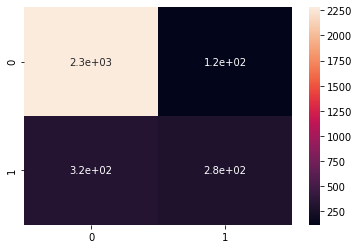

In [189]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix')
print(cm)
sns.heatmap(cm,  annot=True)

In [190]:
print('Accuracy Score =', accuracy_score(y_test, y_pred))

Accuracy Score = 0.855
